In [1]:
# =========================================
# Multi-p CPD training & evaluation script
# =========================================
import os, re, random, math
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import os, time, json, shutil

In [2]:
print(os.listdir("/kaggle/input/cl15-3lakh-per-p-type2-nn-dataset/out_tpye_two_15"))

['bsc_p0.01_C1_n15_k11.csv', 'bsc_p0.03_C1_n15_k11.csv', 'bsc_p0.07_C2_n15_k7.csv', 'bsc_p0.005_C2_n15_k7.csv', 'bsc_p0.095_C1_n15_k11.csv', 'bsc_p0.08_C1_n15_k11.csv', 'bsc_p0.04_C2_n15_k7.csv', 'bsc_p0.055_C2_n15_k7.csv', 'bsc_p0.02_C1_n15_k11.csv', 'bsc_p0.015_C1_n15_k11.csv', 'bsc_p0.035_C2_n15_k7.csv', 'bsc_p0.075_C1_n15_k11.csv', 'bsc_p0.09_C2_n15_k7.csv', 'bsc_p0.05_C1_n15_k11.csv', 'bsc_p0.015_C2_n15_k7.csv', 'bsc_p0.06_C2_n15_k7.csv', 'bsc_p0.065_C1_n15_k11.csv', 'bsc_p0.005_C1_n15_k11.csv', 'bsc_p0.06_C1_n15_k11.csv', 'bsc_p0.001_C2_n15_k7.csv', 'bsc_p0.05_C2_n15_k7.csv', 'bsc_p0.001_C1_n15_k11.csv', 'bsc_p0.025_C1_n15_k11.csv', 'bsc_p0.07_C1_n15_k11.csv', 'bsc_p0.025_C2_n15_k7.csv', 'bsc_p0.075_C2_n15_k7.csv', 'bsc_p0.045_C1_n15_k11.csv', 'bsc_p0.09_C1_n15_k11.csv', 'bsc_p0.055_C1_n15_k11.csv', 'bsc_p0.01_C2_n15_k7.csv', 'bsc_p0.035_C1_n15_k11.csv', 'bsc_p0.085_C2_n15_k7.csv', 'bsc_p0.03_C2_n15_k7.csv', 'bsc_p0.08_C2_n15_k7.csv', 'bsc_p0.095_C2_n15_k7.csv', 'bsc_p0.1_C1_n15_

Held-out p values (UNSEEN in training): [0.05, 0.095]
Seen p values (used for training):     [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.1]
Unique p values found: [0.05, 0.095, 0.085, 0.07, 0.001, 0.09, 0.055, 0.01, 0.015, 0.045, 0.025, 0.035, 0.02, 0.1, 0.03, 0.075, 0.08, 0.04, 0.005, 0.065, 0.06]
Total unique p values: 21
Training samples: 550000
Validation samples: 55000
Test (seen-p) samples: 55000
Test (unseen-p) samples: 55000


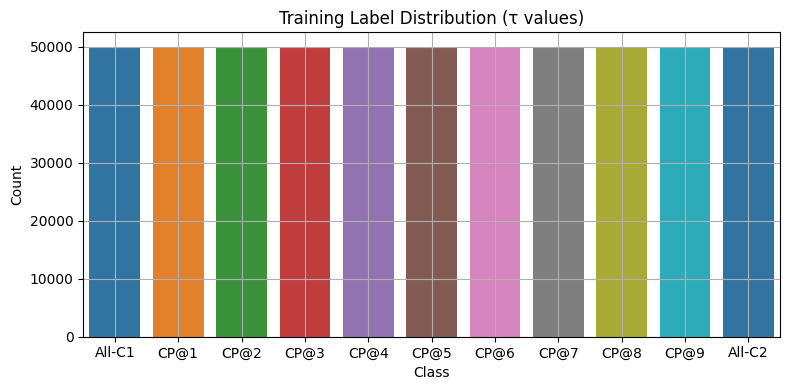

Training:   2%|▏         | 1/50 [00:45<37:27, 45.87s/it]

Epoch 01 | TrainLoss 2.3992 | ValAcc 0.0896


Training:   4%|▍         | 2/50 [01:31<36:41, 45.87s/it]

Epoch 02 | TrainLoss 2.3980 | ValAcc 0.0945


Training:   6%|▌         | 3/50 [02:17<35:57, 45.89s/it]

Epoch 03 | TrainLoss 2.3972 | ValAcc 0.0989


Training:   8%|▊         | 4/50 [03:03<35:09, 45.86s/it]

Epoch 04 | TrainLoss 2.3006 | ValAcc 0.2000


Training:  10%|█         | 5/50 [03:49<34:23, 45.86s/it]

Epoch 05 | TrainLoss 1.9742 | ValAcc 0.3217


Training:  12%|█▏        | 6/50 [04:35<33:40, 45.92s/it]

Epoch 06 | TrainLoss 1.8080 | ValAcc 0.3698


Training:  14%|█▍        | 7/50 [05:21<32:55, 45.95s/it]

Epoch 07 | TrainLoss 1.6878 | ValAcc 0.4208


Training:  16%|█▌        | 8/50 [06:07<32:08, 45.91s/it]

Epoch 08 | TrainLoss 1.5966 | ValAcc 0.4636


Training:  18%|█▊        | 9/50 [06:53<31:24, 45.96s/it]

Epoch 09 | TrainLoss 1.5313 | ValAcc 0.4950


Training:  20%|██        | 10/50 [07:38<30:34, 45.86s/it]

Epoch 10 | TrainLoss 1.4805 | ValAcc 0.5217


Training:  22%|██▏       | 11/50 [08:24<29:49, 45.89s/it]

Epoch 11 | TrainLoss 1.4345 | ValAcc 0.5524


Training:  24%|██▍       | 12/50 [09:10<29:05, 45.92s/it]

Epoch 12 | TrainLoss 1.3890 | ValAcc 0.5813


Training:  26%|██▌       | 13/50 [09:56<28:16, 45.86s/it]

Epoch 13 | TrainLoss 1.3402 | ValAcc 0.6008


Training:  28%|██▊       | 14/50 [10:42<27:29, 45.81s/it]

Epoch 14 | TrainLoss 1.3011 | ValAcc 0.6231


Training:  30%|███       | 15/50 [11:28<26:42, 45.78s/it]

Epoch 15 | TrainLoss 1.2655 | ValAcc 0.6384


Training:  32%|███▏      | 16/50 [12:13<25:55, 45.74s/it]

Epoch 16 | TrainLoss 1.2311 | ValAcc 0.6490


Training:  34%|███▍      | 17/50 [12:59<25:09, 45.73s/it]

Epoch 17 | TrainLoss 1.2015 | ValAcc 0.6589


Training:  36%|███▌      | 18/50 [13:44<24:22, 45.70s/it]

Epoch 18 | TrainLoss 1.1728 | ValAcc 0.6710


Training:  38%|███▊      | 19/50 [14:30<23:39, 45.80s/it]

Epoch 19 | TrainLoss 1.1468 | ValAcc 0.6779


Training:  40%|████      | 20/50 [15:16<22:53, 45.80s/it]

Epoch 20 | TrainLoss 1.1253 | ValAcc 0.6841


Training:  42%|████▏     | 21/50 [16:02<22:06, 45.76s/it]

Epoch 21 | TrainLoss 1.1058 | ValAcc 0.6906


Training:  44%|████▍     | 22/50 [16:48<21:22, 45.79s/it]

Epoch 22 | TrainLoss 1.0892 | ValAcc 0.6963


Training:  46%|████▌     | 23/50 [17:33<20:34, 45.71s/it]

Epoch 23 | TrainLoss 1.0735 | ValAcc 0.7020


Training:  48%|████▊     | 24/50 [18:19<19:49, 45.73s/it]

Epoch 24 | TrainLoss 1.0600 | ValAcc 0.7046


Training:  50%|█████     | 25/50 [19:05<19:02, 45.68s/it]

Epoch 25 | TrainLoss 1.0459 | ValAcc 0.7072


Training:  52%|█████▏    | 26/50 [19:51<18:17, 45.73s/it]

Epoch 26 | TrainLoss 1.0321 | ValAcc 0.7118


Training:  54%|█████▍    | 27/50 [20:36<17:31, 45.70s/it]

Epoch 27 | TrainLoss 1.0187 | ValAcc 0.7128


Training:  56%|█████▌    | 28/50 [21:22<16:44, 45.64s/it]

Epoch 28 | TrainLoss 1.0072 | ValAcc 0.7164


Training:  58%|█████▊    | 29/50 [22:07<15:58, 45.65s/it]

Epoch 29 | TrainLoss 0.9937 | ValAcc 0.7182


Training:  60%|██████    | 30/50 [22:53<15:13, 45.67s/it]

Epoch 30 | TrainLoss 0.9823 | ValAcc 0.7205


Training:  62%|██████▏   | 31/50 [23:39<14:29, 45.76s/it]

Epoch 31 | TrainLoss 0.9715 | ValAcc 0.7219


Training:  64%|██████▍   | 32/50 [24:25<13:44, 45.79s/it]

Epoch 32 | TrainLoss 0.9627 | ValAcc 0.7233


Training:  66%|██████▌   | 33/50 [25:11<12:58, 45.80s/it]

Epoch 33 | TrainLoss 0.9557 | ValAcc 0.7256


Training:  68%|██████▊   | 34/50 [25:56<12:12, 45.76s/it]

Epoch 34 | TrainLoss 0.9487 | ValAcc 0.7271


Training:  70%|███████   | 35/50 [26:42<11:26, 45.74s/it]

Epoch 35 | TrainLoss 0.9405 | ValAcc 0.7279


Training:  72%|███████▏  | 36/50 [27:28<10:40, 45.72s/it]

Epoch 36 | TrainLoss 0.9339 | ValAcc 0.7289


Training:  74%|███████▍  | 37/50 [28:14<09:55, 45.77s/it]

Epoch 37 | TrainLoss 0.9294 | ValAcc 0.7306


Training:  76%|███████▌  | 38/50 [28:59<09:09, 45.80s/it]

Epoch 38 | TrainLoss 0.9222 | ValAcc 0.7295


Training:  78%|███████▊  | 39/50 [29:45<08:23, 45.81s/it]

Epoch 39 | TrainLoss 0.9141 | ValAcc 0.7316


Training:  80%|████████  | 40/50 [30:32<07:39, 45.96s/it]

Epoch 40 | TrainLoss 0.9090 | ValAcc 0.7327


Training:  82%|████████▏ | 41/50 [31:18<06:54, 46.05s/it]

Epoch 41 | TrainLoss 0.9034 | ValAcc 0.7316


Training:  84%|████████▍ | 42/50 [32:04<06:07, 45.93s/it]

Epoch 42 | TrainLoss 0.8976 | ValAcc 0.7357


Training:  86%|████████▌ | 43/50 [32:50<05:21, 45.95s/it]

Epoch 43 | TrainLoss 0.8952 | ValAcc 0.7333


Training:  88%|████████▊ | 44/50 [33:35<04:35, 45.84s/it]

Epoch 44 | TrainLoss 0.8907 | ValAcc 0.7346


Training:  90%|█████████ | 45/50 [34:21<03:49, 45.85s/it]

Epoch 45 | TrainLoss 0.8863 | ValAcc 0.7336


Training:  90%|█████████ | 45/50 [35:07<03:54, 46.83s/it]

Epoch 46 | TrainLoss 0.8827 | ValAcc 0.7367
Early stopping.



Test Accuracy (seen-p):   0.7395
Test Accuracy (unseen-p): 0.6152
Overall Test Accuracy (seen+unseen): 0.6774


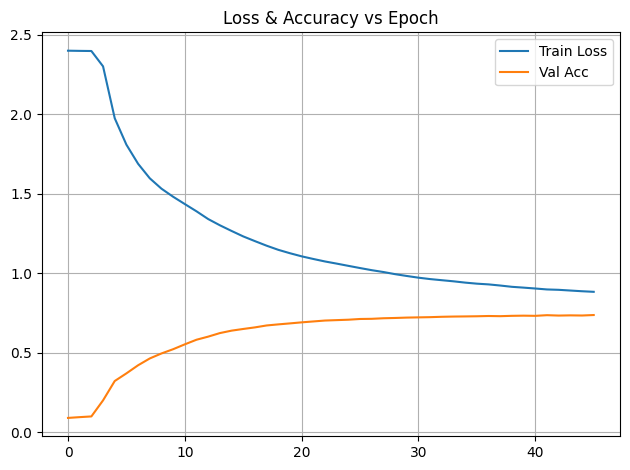

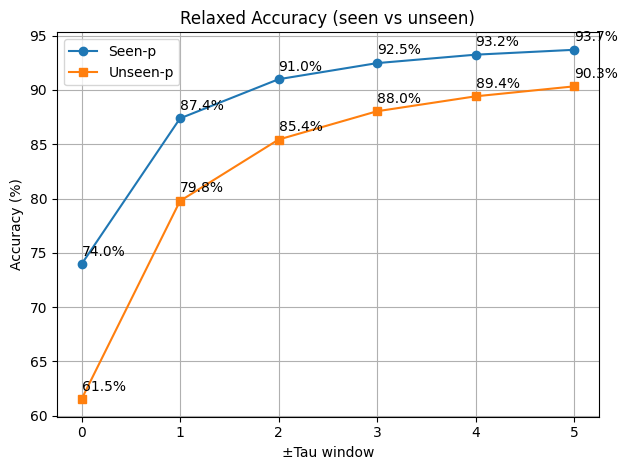

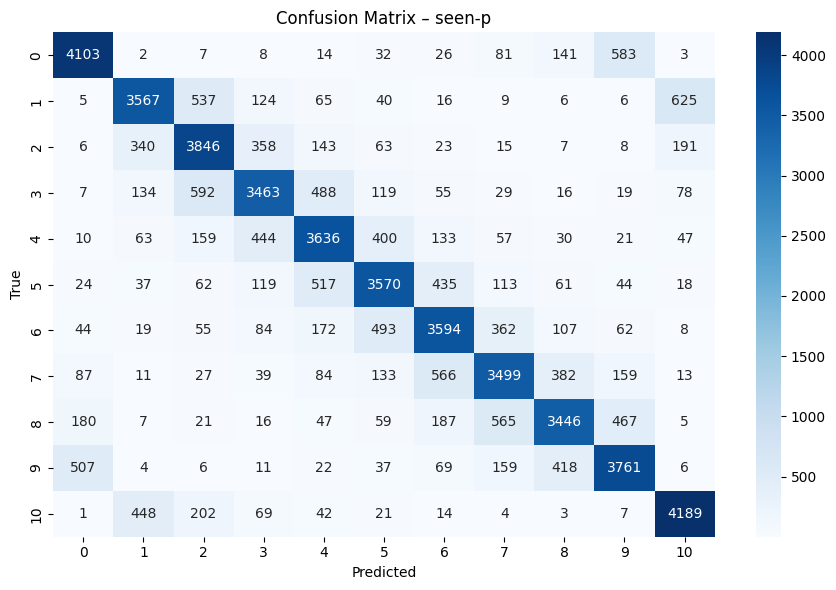

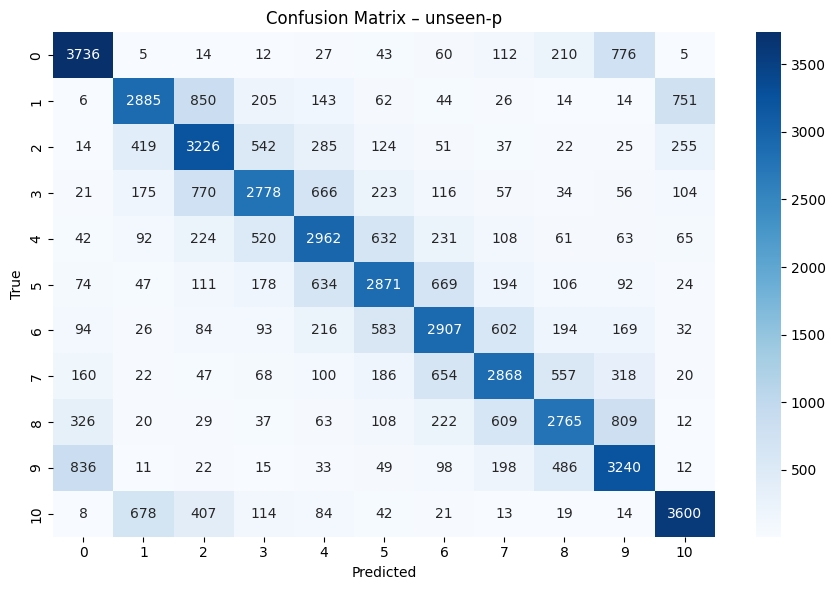

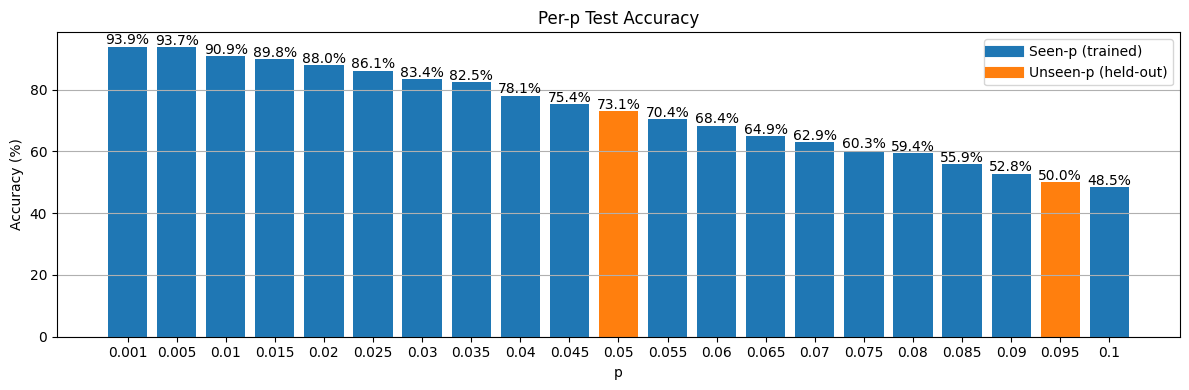


Per-p Accuracies (%):
  p=0.001    93.89   (seen )
  p=0.005    93.75   (seen )
  p=0.01     90.88   (seen )
  p=0.015    89.81   (seen )
  p=0.02     87.98   (seen )
  p=0.025    86.08   (seen )
  p=0.03     83.42   (seen )
  p=0.035    82.45   (seen )
  p=0.04     78.10   (seen )
  p=0.045    75.37   (seen )
  p=0.05     73.08   (UNSEEN)
  p=0.055    70.43   (seen )
  p=0.06     68.36   (seen )
  p=0.065    64.91   (seen )
  p=0.07     62.90   (seen )
  p=0.075    60.26   (seen )
  p=0.08     59.36   (seen )
  p=0.085    55.87   (seen )
  p=0.09     52.76   (seen )
  p=0.095    49.97   (UNSEEN)
  p=0.1      48.48   (seen )


In [42]:
# ---------------- Config -----------------
SEED = 0
T = 10
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 50000
SAMPLES_PER_CLASS_VAL   = int(0.10 * SAMPLES_PER_CLASS_TRAIN)
SAMPLES_PER_CLASS_TEST  = int(0.10 * SAMPLES_PER_CLASS_TRAIN)  # per split
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# where your many-ps csvs live:
DATA_DIR = "/kaggle/input/cl15-3lakh-per-p-type2-nn-dataset/out_tpye_two_15"

# -------------- Reproducibility ----------
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -------- Load all CSVs by (p, C) --------
# expect filenames like: bsc_p0.01_C1_n15_k11.csv  or  bsc_p0.07_C2_n15_k7.csv
rx = re.compile(r"bsc_p([0-9.]+)_C([12])_n15_k(11|7)\.csv$")
data = {}   # key: (p_float, "C1"/"C2") -> np.ndarray [n_codewords, FEATURE_SIZE]

for fn in os.listdir(DATA_DIR):
    m = rx.match(fn)
    if not m:
        continue
    p_val = float(m.group(1))
    C = "C" + m.group(2)
    arr = pd.read_csv(os.path.join(DATA_DIR, fn)).values
    data[(p_val, C)] = arr

# keep only p that have BOTH C1 and C2
ps_have_both = sorted({p for (p, C) in data.keys() if (p, "C1") in data and (p, "C2") in data})
assert len(ps_have_both) >= 4, "Need at least 4 different p to hold out 2 and still have variety."

# infer feature size
FEATURE_SIZE = next(iter(data.values())).shape[1]

# ---- choose two p values to hold out entirely ----
random.shuffle(ps_have_both)
HELDOUT_PS = sorted(ps_have_both[:2])           # unseen at train time
TRAIN_PS   = sorted(ps_have_both[2:])           # used for train/val
print("Held-out p values (UNSEEN in training):", HELDOUT_PS)
print("Seen p values (used for training):    ", TRAIN_PS)

print("Unique p values found:", ps_have_both)
print("Total unique p values:", len(ps_have_both))


# ------------- Data generator -------------
def _cycle(lst):
    while True:
        for x in lst:
            yield x

def generate_data_cpd_multi_ps(N_per_class, T, ps_pool, data_dict, balance=True):
    """
    Build sequences with same p across the whole sequence.
    For class 0 -> All-C1 (T from C1_p), class T -> All-C2 (T from C2_p),
    For class tau in 1..T-1 -> tau from C1_p then (T-tau) from C2_p, all at same p.
    If balance=True, allocate ~equal number of samples per p for each class.
    """
    X, y, p_of_sample = [], [], []
    ps_list = list(ps_pool)
    if balance:
        per_p = math.ceil(N_per_class / len(ps_list))
    g = _cycle(ps_list)

    for cls in range(NUM_CLASSES):
        made = 0
        while made < N_per_class:
            p = next(g)
            # draw indices
            C1_arr = data_dict[(p, "C1")]
            C2_arr = data_dict[(p, "C2")]
            if cls == 0:
                idx = np.random.choice(len(C1_arr), T, replace=True)
                sample = C1_arr[idx]
            elif cls == T:
                idx = np.random.choice(len(C2_arr), T, replace=True)
                sample = C2_arr[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(C1_arr), tau, replace=True)
                idx2 = np.random.choice(len(C2_arr), T - tau, replace=True)
                sample = np.vstack([C1_arr[idx1], C2_arr[idx2]])
            X.append(sample)
            y.append(cls)
            p_of_sample.append(p)
            made += 1
    return np.array(X), np.array(y), np.array(p_of_sample)

# ------------- Build splits ----------------
# train/val from TRAIN_PS, tests built separately
X_train, y_train, p_train = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TRAIN, T, TRAIN_PS, data, balance=True)
X_val,   y_val,   p_val   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_VAL,   T, TRAIN_PS, data, balance=True)

# test on seen-p and unseen-p separately
X_test_seen,   y_test_seen,   p_test_seen   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, TRAIN_PS,   data, balance=True)
X_test_unseen, y_test_unseen, p_test_unseen = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, HELDOUT_PS, data, balance=True)


# >>> Insert the dataset size checks & bar plot here <<<
print("Training samples:", len(y_train))
print("Validation samples:", len(y_val))
print("Test (seen-p) samples:", len(y_test_seen))
print("Test (unseen-p) samples:", len(y_test_unseen))

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------- Build per-p views from the ACTUAL test sets ----------
def per_p_views(X, y, p_arr):
    views = {}
    for p in sorted(np.unique(p_arr)):
        mask = (p_arr == p)
        views[p] = (X[mask], y[mask])
    return views

per_p_tests_seen   = per_p_views(X_test_seen,   y_test_seen,   p_test_seen)
per_p_tests_unseen = per_p_views(X_test_unseen, y_test_unseen, p_test_unseen)

# merge seen + unseen so we can print a single table later
per_p_tests_all = {**per_p_tests_seen, **per_p_tests_unseen}

# --------- Dataset & Loaders --------------
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_seen_loader   = DataLoader(ChangepointDataset(X_test_seen,   y_test_seen),   batch_size=BATCH_SIZE)
test_unseen_loader = DataLoader(ChangepointDataset(X_test_unseen, y_test_unseen), batch_size=BATCH_SIZE)

# --------------- Model --------------------
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels!=out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)
    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, 5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, 7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels*3)
    def forward(self, x):
        x1 = self.branch1(x); x2 = self.branch2(x); x3 = self.branch3(x)
        return F.relu(self.bn(torch.cat([x1,x2,x3], dim=1)))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,128))
        else:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,96),
                                            ResidualBlock1D(96,128), ResidualBlock1D(128,128))
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(128,128), nn.ReLU(), nn.Dropout(0.5),
                                        nn.Linear(128,num_classes))
    def forward(self, x):
        x = x.permute(0,2,1)            # [B,T,F] -> [B,F,T]
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.pool(x)
        return self.classifier(x)

# -------------- Train ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(FEATURE_SIZE, NUM_CLASSES, T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc, epochs_no_improve = 0.0, 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training"):
    model.train()
    running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item()
    train_loss = running / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValAcc {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping.")
            break

# -------------- Evaluation helpers --------
def eval_loader(loader):
    model.eval()
    ys, yhats = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu().numpy()
            ys.extend(yb.numpy()); yhats.extend(pred)
    ys = np.array(ys); yhats = np.array(yhats)
    return ys, yhats

def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

# restore best
model.load_state_dict({k: v.to(device) for k,v in best_state.items()})

# overall seen/unseen
y_seen,  yhat_seen  = eval_loader(test_seen_loader)
y_un,    yhat_un    = eval_loader(test_unseen_loader)

acc_seen   = accuracy_score(y_seen, yhat_seen)
acc_unseen = accuracy_score(y_un,   yhat_un)
print(f"\nTest Accuracy (seen-p):   {acc_seen:.4f}")
print(f"Test Accuracy (unseen-p): {acc_unseen:.4f}")

# ---------- Overall combined accuracy ----------
total_correct = (y_seen == yhat_seen).sum() + (y_un == yhat_un).sum()
total_samples = len(y_seen) + len(y_un)
overall_acc   = total_correct / total_samples
print(f"Overall Test Accuracy (seen+unseen): {overall_acc:.4f}")

# per-p accuracies
per_p_acc = {}
for p, (Xp, yp) in per_p_tests_all.items():
    dl = DataLoader(ChangepointDataset(Xp, yp), batch_size=BATCH_SIZE)
    yt, yhat = eval_loader(dl)
    per_p_acc[p] = accuracy_score(yt, yhat)

# -------------- Plots ---------------------
# training curves
plt.figure(); plt.plot(train_losses, label="Train Loss"); plt.plot(val_accuracies, label="Val Acc")
plt.title("Loss & Accuracy vs Epoch"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# relaxed accuracy curves
wins = list(range(6))
rel_seen   = [relaxed_accuracy(y_seen, yhat_seen, w)*100   for w in wins]
rel_unseen = [relaxed_accuracy(y_un,   yhat_un,   w)*100   for w in wins]
plt.figure(); plt.plot(wins, rel_seen,  marker='o', label='Seen-p')
plt.plot(wins, rel_unseen, marker='s', label='Unseen-p')
for x,y in zip(wins, rel_seen):  plt.text(x, y+0.8,  f"{y:.1f}%")
for x,y in zip(wins, rel_unseen):plt.text(x, y+0.8,  f"{y:.1f}%")
plt.xlabel("±Tau window"); plt.ylabel("Accuracy (%)"); plt.title("Relaxed Accuracy (seen vs unseen)"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# confusion matrices
def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(NUM_CLASSES))
    plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
show_cm(y_seen, yhat_seen,  "Confusion Matrix – seen-p")
show_cm(y_un,   yhat_un,    "Confusion Matrix – unseen-p")

# per-p bar chart
ps_sorted = sorted(per_p_acc.keys())
vals = [per_p_acc[p]*100 for p in ps_sorted]
colors = ["tab:blue" if p in TRAIN_PS else "tab:orange" for p in ps_sorted]
plt.figure(figsize=(12,4))
plt.bar([str(p) for p in ps_sorted], vals, color=colors)
for i,v in enumerate(vals): plt.text(i, v+0.8, f"{v:.1f}%", ha='center')
plt.title("Per-p Test Accuracy"); plt.xlabel("p"); plt.ylabel("Accuracy (%)")
legend_patches = [plt.Line2D([0],[0], color='tab:blue', lw=8, label='Seen-p (trained)'),
                  plt.Line2D([0],[0], color='tab:orange', lw=8, label='Unseen-p (held-out)')]
plt.legend(handles=legend_patches); plt.grid(True, axis='y'); plt.tight_layout(); plt.show()

# also print a small table
print("\nPer-p Accuracies (%):")
for p in ps_sorted:
    tag = "seen " if p in TRAIN_PS else "UNSEEN"
    print(f"  p={p:<6}  {per_p_acc[p]*100:6.2f}   ({tag})")

In [43]:
# ========= Save results to CSVs =========
import os, time, json, shutil

RESULTS_DIR = f"/kaggle/working/Type2_NN_cl_15_T{T}_Results"
os.makedirs(RESULTS_DIR, exist_ok=True)

run_stamp = time.strftime("%Y%m%d-%H%M%S")  # for uniqueness

# --- 1) Per-p accuracy table ---
rows = []
for p in ps_sorted:
    rows.append({
        "p": p,
        "accuracy": per_p_acc[p],
        "accuracy_percent": per_p_acc[p] * 100.0,
        "seen_or_unseen": "seen" if p in TRAIN_PS else "unseen"
    })
per_p_df = pd.DataFrame(rows)
per_p_path = os.path.join(
    RESULTS_DIR,
    f"per_p_acc_T{T}_train{SAMPLES_PER_CLASS_TRAIN}_{run_stamp}.csv"
)
per_p_df.to_csv(per_p_path, index=False)

# --- 2) Summary CSV (seen/unseen/overall + config) ---
summary = { 
    "timestamp": run_stamp,
    "samples_per_class_train": SAMPLES_PER_CLASS_TRAIN,
    "samples_per_class_val": SAMPLES_PER_CLASS_VAL,
    "samples_per_class_test": SAMPLES_PER_CLASS_TEST,
    "T": T,
    "num_classes": NUM_CLASSES,
    "num_seen_ps": len(TRAIN_PS),
    "num_unseen_ps": len(HELDOUT_PS),
    "seen_ps": json.dumps(TRAIN_PS),
    "unseen_ps": json.dumps(HELDOUT_PS),
    "acc_seen": float(acc_seen),
    "acc_unseen": float(acc_unseen),
    "acc_overall": float(overall_acc)
}
summary_df = pd.DataFrame([summary])
summary_path = os.path.join(
    RESULTS_DIR,
    f"summary_T{T}_train{SAMPLES_PER_CLASS_TRAIN}_{run_stamp}.csv"
)
summary_df.to_csv(summary_path, index=False)

print(f"\nSaved per-p table -> {per_p_path}")
print(f"Saved summary     -> {summary_path}")

# --- Zip the whole folder and place zip in Outputs ---
zip_base = f"/kaggle/working/Type2_NN_cl_15_T{T}_Results"
zip_path = shutil.make_archive(zip_base, "zip", RESULTS_DIR)
os.makedirs("/kaggle/outputs", exist_ok=True)
out_zip_path = f"/kaggle/outputs/Type2_NN_cl_15_T{T}_Results.zip"
shutil.move(zip_path, out_zip_path)
print(f"Zipped folder     -> {out_zip_path}")



Saved per-p table -> /kaggle/working/Type2_NN_cl_15_T10_Results/per_p_acc_T10_train50000_20250904-102456.csv
Saved summary     -> /kaggle/working/Type2_NN_cl_15_T10_Results/summary_T10_train50000_20250904-102456.csv
Zipped folder     -> /kaggle/outputs/Type2_NN_cl_15_T10_Results.zip


In [45]:
import os, shutil, pathlib, glob, sys

# <<< set T to whatever you ran >>>
T_val = T  # or e.g. 5

# paths
RESULTS_DIR = f"/kaggle/working/Type2_NN_cl_15_T{T_val}_Results"
zip_base    = f"/kaggle/working/Type2_NN_cl_15_T{T_val}_Results"
zip_name    = f"Type2_NN_cl_15_T{T_val}_Results.zip"

# sanity checks
if not os.path.isdir(RESULTS_DIR):
    print(f"[!] Results folder not found: {RESULTS_DIR}")
    print("    Run your training/eval cell that writes the CSVs first.")
    sys.exit(0)

# 1) create/overwrite zip in /kaggle/working
zip_path = shutil.make_archive(zip_base, "zip", RESULTS_DIR)

# 2) move zip to /kaggle/outputs (persist with the run)
os.makedirs("/kaggle/outputs", exist_ok=True)
out_zip_outputs = f"/kaggle/outputs/{pathlib.Path(zip_path).name}"
# if an old file exists, remove to avoid collision
if os.path.exists(out_zip_outputs):
    os.remove(out_zip_outputs)
shutil.move(zip_path, out_zip_outputs)

# 3) also copy to /kaggle/working (easy manual download from Files pane)
out_zip_working = f"/kaggle/working/{zip_name}"
if os.path.exists(out_zip_working):
    os.remove(out_zip_working)
shutil.copy(out_zip_outputs, out_zip_working)

# 4) show where to click
print("\nZip written to both locations:")
print(" - Outputs (persists with run):", out_zip_outputs)
print(" - Working (Files sidebar):     ", out_zip_working)

print("\nHow to download:")
print("  • In right sidebar, open *Files* → /kaggle/working → click the download arrow on", zip_name)
print("  • Or open *Output* tab (top-right), the zip will be listed there as well.")
print("\nIf Output tab glitches, the /kaggle/working copy is the most reliable to download.")
print("\nCurrent zips in outputs:", glob.glob('/kaggle/outputs/*.zip'))
print("Current zips in working:", glob.glob('/kaggle/working/*.zip'))



Zip written to both locations:
 - Outputs (persists with run): /kaggle/outputs/Type2_NN_cl_15_T10_Results.zip
 - Working (Files sidebar):      /kaggle/working/Type2_NN_cl_15_T10_Results.zip

How to download:
  • In right sidebar, open *Files* → /kaggle/working → click the download arrow on Type2_NN_cl_15_T10_Results.zip
  • Or open *Output* tab (top-right), the zip will be listed there as well.

If Output tab glitches, the /kaggle/working copy is the most reliable to download.

Current zips in outputs: ['/kaggle/outputs/Type2_NN_cl_15_T10_Results.zip']
Current zips in working: ['/kaggle/working/Type2_NN_cl_15_T10_Results.zip']


So in this notebook